In [69]:
import pandas as pd
import numpy as np

In [70]:
df=pd.read_csv(r"C:\Users\User\Downloads\train_v9rqX0R.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data preparation 

In [71]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [72]:
df.duplicated().sum()

0

In [73]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Applying Knn for finding Outlet_Size 


In [75]:
df1=df.drop(["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Location_Type","Outlet_Type"],axis=1)
df1


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,9.300,0.016047,249.8092,Medium,3735.1380
1,5.920,0.019278,48.2692,Medium,443.4228
2,17.500,0.016760,141.6180,Medium,2097.2700
3,19.200,0.000000,182.0950,NaN,732.3800
4,8.930,0.000000,53.8614,High,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,High,2778.3834
8519,8.380,0.046982,108.1570,NaN,549.2850
8520,10.600,0.035186,85.1224,Small,1193.1136
8521,7.210,0.145221,103.1332,Medium,1845.5976


In [76]:
df2=df1.drop(["Outlet_Size"],axis=1)
df2

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
from sklearn.model_selection import train_test_split

train_x = df2
train_y = df['Outlet_Size']

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.005,random_state=20)

In [79]:
X_train.tail()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
5910,8.895,0.039009,209.0296,2285.0256
3915,NaN,0.040226,210.9928,210.3928
7068,6.590,0.026238,121.6098,2410.1960
7391,15.150,0.046497,149.6708,300.9416
4367,17.700,0.029933,169.0816,5201.2296


In [80]:
import numpy as np
from sklearn.impute import KNNImputer

knn=KNNImputer()
x_train_tr=knn.fit_transform(X_train)

In [81]:
dff=pd.DataFrame(x_train_tr,columns=["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"])

In [82]:
dff.iloc[3915,]

Item_Weight            20.750000
Item_Visibility         0.024129
Item_MRP              124.173000
Item_Outlet_Sales    2956.152000
Name: 3915, dtype: float64

In [83]:
dff

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,15.700,0.122471,131.7942,1987.4130
1,18.850,0.040434,244.3144,5635.3312
2,6.590,0.043828,121.4098,241.0196
3,7.475,0.126753,154.2656,308.9312
4,8.270,0.018798,241.2880,5512.8240
...,...,...,...,...
8475,8.895,0.039009,209.0296,2285.0256
8476,10.358,0.040226,210.9928,210.3928
8477,6.590,0.026238,121.6098,2410.1960
8478,15.150,0.046497,149.6708,300.9416


In [84]:
dff.isnull().sum()

Item_Weight          0
Item_Visibility      0
Item_MRP             0
Item_Outlet_Sales    0
dtype: int64

In [85]:
dff["Item_Weight"].iloc[3915,]

20.75

# clustering 

In [86]:
y=~(y_train.notnull())

In [87]:
r=y[y].index.values


In [88]:
r

array([1224, 6044, 1239, ..., 5589, 7068, 7391], dtype=int64)

In [89]:
indexes=pd.DataFrame(r)
indexes=indexes.rename({0:"index"},axis=1)
indexes

,index
0,1224
1,6044
2,1239
3,5468
4,2517
...,...
2389,5375
2390,3814
2391,5589
2392,7068


In [90]:
dfo=pd.DataFrame(y_train)
dfo["index"]=dfo.index
dfo

,Outlet_Size,index
3040,Small,3040
4884,Medium,4884
1224,NaN,1224
6044,NaN,6044
3542,High,3542
...,...,...
5910,High,5910
3915,Small,3915
7068,NaN,7068
7391,NaN,7391


In [91]:
m=pd.merge(dfo,indexes,how="right",on="index")
m=m.replace({"NaN":""})
m

,Outlet_Size,index
0,NaN,1224
1,NaN,6044
2,NaN,1239
3,NaN,5468
4,NaN,2517
...,...,...
2389,NaN,5375
2390,NaN,3814
2391,NaN,5589
2392,NaN,7068


In [92]:
m=m.replace({np.NaN:""})


In [93]:
m

,Outlet_Size,index
0,,1224
1,,6044
2,,1239
3,,5468
4,,2517
...,...,...
2389,,5375
2390,,3814
2391,,5589
2392,,7068


In [94]:
test_data=m

# test data for clustering

In [95]:
test_data

,Outlet_Size,index
0,,1224
1,,6044
2,,1239
3,,5468
4,,2517
...,...,...
2389,,5375
2390,,3814
2391,,5589
2392,,7068


In [96]:
dfo

,Outlet_Size,index
3040,Small,3040
4884,Medium,4884
1224,NaN,1224
6044,NaN,6044
3542,High,3542
...,...,...
5910,High,5910
3915,Small,3915
7068,NaN,7068
7391,NaN,7391


In [97]:
dfo1=dfo.dropna()

In [98]:
# Qualitative Variable
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700


In [99]:
import numpy as np
from sklearn.impute import KNNImputer

knn=KNNImputer()
Quantitative_Variable_tr=knn.fit_transform(Quantitative_Variable)

In [100]:
Quantitative_Variable.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [101]:
dfs=pd.DataFrame(Quantitative_Variable_tr,columns=['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'])

In [102]:
dfs.iloc[3915,]

Item_Weight                    10.358000
Item_Visibility                 0.040226
Item_MRP                      210.992800
Outlet_Establishment_Year    1985.000000
Item_Outlet_Sales             210.392800
Name: 3915, dtype: float64

In [103]:
# Qualitative Variable
 

In [104]:
dfs

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999.0,3735.1380
1,5.920,0.019278,48.2692,2009.0,443.4228
2,17.500,0.016760,141.6180,1999.0,2097.2700
3,19.200,0.000000,182.0950,1998.0,732.3800
4,8.930,0.000000,53.8614,1987.0,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2778.3834
8519,8.380,0.046982,108.1570,2002.0,549.2850
8520,10.600,0.035186,85.1224,2004.0,1193.1136
8521,7.210,0.145221,103.1332,2009.0,1845.5976


In [105]:
samples=dfs.values

In [106]:
from sklearn.cluster import KMeans

ks = range(1,10)   #ks=1,2,3,4,5 (n-1)
SSE = [] # within-cluster sum-of-squares ( empty list)


#k=ks=

for k in ks:  # k = 1,2,3,4,5
    # Create a KMeans instance with k clusters:
    
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_) 
    # Inertia: Sum of distances of samplesto their closest cluster center

In [107]:
SSE

[24851070873.09461,
 8311339016.427422,
 4080473446.4411573,
 2506615632.90218,
 1656291802.5513172,
 1201189205.284791,
 902272234.8261061,
 711330539.746511,
 572443554.4641747]

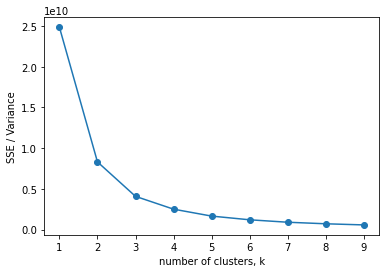

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot ks vs inertias
plt.plot(ks, SSE, '-o') # -o is point in graph to identify the cluster
plt.xlabel('number of clusters, k')
plt.ylabel('SSE / Variance')
plt.xticks(ks) # to get exact number of cluster without decimal
plt.show()

In [109]:
model2 = KMeans(n_clusters=3,max_iter=100)

In [110]:
dfs['Cluster_Made'] = model2.fit_predict(samples)
dfs

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Cluster_Made
0,9.300,0.016047,249.8092,1999.0,3735.1380,2
1,5.920,0.019278,48.2692,2009.0,443.4228,1
2,17.500,0.016760,141.6180,1999.0,2097.2700,2
3,19.200,0.000000,182.0950,1998.0,732.3800,1
4,8.930,0.000000,53.8614,1987.0,994.7052,1
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2778.3834,2
8519,8.380,0.046982,108.1570,2002.0,549.2850,1
8520,10.600,0.035186,85.1224,2004.0,1193.1136,1
8521,7.210,0.145221,103.1332,2009.0,1845.5976,1


In [111]:
dfs.Cluster_Made.value_counts(ascending=False)

1    4443
2    2971
0    1109
Name: Cluster_Made, dtype: int64

In [112]:
df.iloc[43:70,]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.350,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.5228
44,FDL50,12.150,Regular,0.042278,Canned,126.5046,OUT013,1987,High,Tier 3,Supermarket Type1,373.5138
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972
48,FDL12,15.850,Regular,0.121633,Baking Goods,60.6220,OUT046,1997,Small,Tier 1,Supermarket Type1,2576.6460
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
50,NCL17,7.390,Low Fat,0.067780,Health and Hygiene,143.8812,OUT046,1997,Small,Tier 1,Supermarket Type1,3134.5864
51,FDM40,10.195,Low Fat,0.159804,Frozen Foods,141.5154,OUT013,1987,High,Tier 3,Supermarket Type1,850.8924
52,FDR13,9.895,Regular,0.028697,Canned,117.0492,OUT013,1987,High,Tier 3,Supermarket Type1,810.9444


In [113]:
dfs[dfs['Cluster_Made']==2]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Cluster_Made
0,9.300,0.016047,249.8092,1999.0,3735.1380,2
2,17.500,0.016760,141.6180,1999.0,2097.2700,2
7,16.850,0.127470,107.7622,1985.0,4022.7636,2
11,18.500,0.045464,144.1102,1997.0,2187.1530,2
13,17.600,0.047257,119.6782,1997.0,2145.2076,2
...,...,...,...,...,...,...
8506,17.250,0.084676,263.1910,2009.0,3944.8650,2
8508,11.350,0.043246,199.4742,2002.0,2587.9646,2
8512,20.700,0.042801,178.3028,1987.0,2479.4392,2
8517,20.750,0.083607,178.8318,1997.0,3608.6360,2


# 0 is Medium, 1 is high, 2 is Small  

In [114]:
dfs['Cluster_Made'] = model2.fit_predict(samples)
dfs

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Cluster_Made
0,9.300,0.016047,249.8092,1999.0,3735.1380,1
1,5.920,0.019278,48.2692,2009.0,443.4228,0
2,17.500,0.016760,141.6180,1999.0,2097.2700,1
3,19.200,0.000000,182.0950,1998.0,732.3800,0
4,8.930,0.000000,53.8614,1987.0,994.7052,0
...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2778.3834,1
8519,8.380,0.046982,108.1570,2002.0,549.2850,0
8520,10.600,0.035186,85.1224,2004.0,1193.1136,0
8521,7.210,0.145221,103.1332,2009.0,1845.5976,0


In [115]:
Qualitative_Variable = df[df.select_dtypes(include=["object"]).columns.tolist()]
Qualitative_Variable.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1


In [116]:
final_data_accuracy=pd.concat([dfs,Qualitative_Variable],axis=1)
final_data_accuracy

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Cluster_Made,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999.0,3735.1380,1,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,5.920,0.019278,48.2692,2009.0,443.4228,0,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,17.500,0.016760,141.6180,1999.0,2097.2700,1,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,19.200,0.000000,182.0950,1998.0,732.3800,0,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,8.930,0.000000,53.8614,1987.0,994.7052,0,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2778.3834,1,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,8.380,0.046982,108.1570,2002.0,549.2850,0,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,10.600,0.035186,85.1224,2004.0,1193.1136,0,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,7.210,0.145221,103.1332,2009.0,1845.5976,0,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [117]:
f=final_data_accuracy.dropna()

In [118]:
f.Cluster_Made.value_counts()

0    2990
1    2225
2     898
Name: Cluster_Made, dtype: int64

In [119]:
f=f.replace({0:"Medium",1:"High",2:"Small"})# 0 is Medium, 1 is high, 2 is Small  
f

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Cluster_Made,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999.0,3735.1380,High,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,5.920,0.019278,48.2692,2009.0,443.4228,Medium,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,17.500,0.01676,141.6180,1999.0,2097.2700,High,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
4,8.930,Medium,53.8614,1987.0,994.7052,Medium,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,10.395,Medium,51.4008,2009.0,556.6088,Medium,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,20.750,0.083607,178.8318,1997.0,3608.6360,High,FDF53,reg,Frozen Foods,OUT046,Small,Tier 1,Supermarket Type1
8518,6.865,0.056783,214.5218,1987.0,2778.3834,High,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8520,10.600,0.035186,85.1224,2004.0,1193.1136,Medium,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,7.210,0.145221,103.1332,2009.0,1845.5976,Medium,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [120]:
f

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Cluster_Made,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999.0,3735.1380,High,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,5.920,0.019278,48.2692,2009.0,443.4228,Medium,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,17.500,0.01676,141.6180,1999.0,2097.2700,High,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
4,8.930,Medium,53.8614,1987.0,994.7052,Medium,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
5,10.395,Medium,51.4008,2009.0,556.6088,Medium,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8517,20.750,0.083607,178.8318,1997.0,3608.6360,High,FDF53,reg,Frozen Foods,OUT046,Small,Tier 1,Supermarket Type1
8518,6.865,0.056783,214.5218,1987.0,2778.3834,High,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8520,10.600,0.035186,85.1224,2004.0,1193.1136,Medium,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,7.210,0.145221,103.1332,2009.0,1845.5976,Medium,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [121]:
from sklearn.metrics import classification_report
print(classification_report(f['Outlet_Size'],f['Cluster_Made']))

              precision    recall  f1-score   support

        High       0.18      0.43      0.25       932
      Medium       0.40      0.42      0.41      2793
       Small       0.28      0.11      0.15      2388

    accuracy                           0.30      6113
   macro avg       0.29      0.32      0.27      6113
weighted avg       0.32      0.30      0.29      6113



In [122]:
#pd.merge(m,f["Cluster_Made"],how="left",on="index")

In [123]:
final_data_accuracy=final_data_accuracy.replace({0:"Medium",1:"High",2:"Small"})
final_data_accuracy

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Cluster_Made,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999.0,3735.1380,High,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,5.920,0.019278,48.2692,2009.0,443.4228,Medium,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,17.500,0.01676,141.6180,1999.0,2097.2700,High,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,19.200,Medium,182.0950,1998.0,732.3800,Medium,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,8.930,Medium,53.8614,1987.0,994.7052,Medium,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2778.3834,High,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,8.380,0.046982,108.1570,2002.0,549.2850,Medium,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,10.600,0.035186,85.1224,2004.0,1193.1136,Medium,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,7.210,0.145221,103.1332,2009.0,1845.5976,Medium,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [124]:
final_data_accuracy=final_data_accuracy.replace({np.NaN:""})

In [125]:
final_data_accuracy["Cluster_Made"].iloc[1224,]

'Medium'

In [126]:
index=list(test_data["index"])
index

[1224,
 6044,
 1239,
 5468,
 2517,
 1743,
 4648,
 2394,
 3666,
 3902,
 6698,
 5542,
 1980,
 1920,
 6274,
 6862,
 3789,
 7732,
 8318,
 5678,
 5202,
 3379,
 8180,
 3534,
 2472,
 7569,
 5257,
 8213,
 880,
 8218,
 5433,
 107,
 5412,
 3871,
 254,
 118,
 6194,
 305,
 2396,
 6506,
 5948,
 8483,
 1825,
 1152,
 7189,
 8346,
 2060,
 3476,
 2281,
 2137,
 3669,
 7491,
 5652,
 7818,
 1368,
 5041,
 6706,
 7893,
 3330,
 5006,
 6959,
 799,
 8496,
 47,
 2835,
 2274,
 1728,
 399,
 4302,
 2408,
 1890,
 7444,
 6847,
 327,
 6254,
 4161,
 8224,
 4831,
 1655,
 5984,
 865,
 3557,
 569,
 7352,
 4709,
 4982,
 3792,
 5088,
 4626,
 3551,
 4330,
 2081,
 2573,
 3146,
 942,
 7572,
 6239,
 6548,
 7593,
 6150,
 6966,
 4419,
 2611,
 8477,
 2678,
 5661,
 2485,
 4788,
 1034,
 6108,
 8272,
 4927,
 7234,
 4711,
 1554,
 3431,
 4447,
 5699,
 2054,
 479,
 322,
 2159,
 3227,
 4446,
 1203,
 3336,
 391,
 8494,
 4223,
 6364,
 8173,
 6002,
 1286,
 4365,
 2080,
 8082,
 5964,
 7056,
 6359,
 4334,
 5988,
 387,
 2554,
 7934,
 7089,
 8

In [127]:

res_list = [final_data_accuracy["Cluster_Made"][i] for i in index]
res_list

['Medium',
 'Medium',
 'Small',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Small',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Small',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Small',
 'Medium',
 'Medium',
 'Small',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Small',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'High',
 'Small',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'High',
 'Medium',
 'High',
 'Medium',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High'

In [128]:
new_data = dict(zip(index, res_list))
new_data

{1224: 'Medium',
 6044: 'Medium',
 1239: 'Small',
 5468: 'Medium',
 2517: 'Medium',
 1743: 'Medium',
 4648: 'High',
 2394: 'Medium',
 3666: 'Medium',
 3902: 'Medium',
 6698: 'Medium',
 5542: 'Medium',
 1980: 'Small',
 1920: 'Medium',
 6274: 'High',
 6862: 'Medium',
 3789: 'Medium',
 7732: 'Small',
 8318: 'Medium',
 5678: 'High',
 5202: 'Medium',
 3379: 'Medium',
 8180: 'High',
 3534: 'High',
 2472: 'Medium',
 7569: 'Medium',
 5257: 'High',
 8213: 'High',
 880: 'Medium',
 8218: 'High',
 5433: 'High',
 107: 'High',
 5412: 'High',
 3871: 'Medium',
 254: 'High',
 118: 'High',
 6194: 'High',
 305: 'High',
 2396: 'High',
 6506: 'Small',
 5948: 'Medium',
 8483: 'Medium',
 1825: 'Small',
 1152: 'High',
 7189: 'Medium',
 8346: 'Medium',
 2060: 'Medium',
 3476: 'High',
 2281: 'High',
 2137: 'High',
 3669: 'Medium',
 7491: 'High',
 5652: 'Medium',
 7818: 'Medium',
 1368: 'Small',
 5041: 'High',
 6706: 'Medium',
 7893: 'High',
 3330: 'Medium',
 5006: 'Medium',
 6959: 'Medium',
 799: 'High',
 8496:

In [129]:

  
# combine this new data with existing DataFrame
final_data_accuracy["Outlet_Size"].update(pd.Series(new_data))
print(final_data_accuracy["Outlet_Size"])

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object


In [130]:
final_data_accuracy=final_data_accuracy.drop(["Cluster_Made"],axis=1)
final_data_accuracy

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999.0,3735.1380,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,5.920,0.019278,48.2692,2009.0,443.4228,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,17.500,0.01676,141.6180,1999.0,2097.2700,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,19.200,Medium,182.0950,1998.0,732.3800,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,8.930,Medium,53.8614,1987.0,994.7052,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2778.3834,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,8.380,0.046982,108.1570,2002.0,549.2850,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,10.600,0.035186,85.1224,2004.0,1193.1136,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,7.210,0.145221,103.1332,2009.0,1845.5976,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [131]:
final_data=final_data_accuracy

In [132]:
final_data_accuracy_copy=final_data_accuracy.copy()
final_data_accuracy_copy

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999.0,3735.1380,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,5.920,0.019278,48.2692,2009.0,443.4228,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,17.500,0.01676,141.6180,1999.0,2097.2700,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,19.200,Medium,182.0950,1998.0,732.3800,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,8.930,Medium,53.8614,1987.0,994.7052,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2778.3834,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,8.380,0.046982,108.1570,2002.0,549.2850,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,10.600,0.035186,85.1224,2004.0,1193.1136,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,7.210,0.145221,103.1332,2009.0,1845.5976,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


# Finally with only getting NaN values replace by the knn output. 

In [133]:
final_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0.016047,249.8092,1999.0,3735.1380,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,5.920,0.019278,48.2692,2009.0,443.4228,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,17.500,0.01676,141.6180,1999.0,2097.2700,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,19.200,Medium,182.0950,1998.0,732.3800,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,8.930,Medium,53.8614,1987.0,994.7052,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987.0,2778.3834,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,8.380,0.046982,108.1570,2002.0,549.2850,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,10.600,0.035186,85.1224,2004.0,1193.1136,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,7.210,0.145221,103.1332,2009.0,1845.5976,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


# Eda 

In [134]:
gkk=final_data.groupby("Item_Type")
gkk

In [135]:
kk = df.groupby(['Team', 'Position'])

KeyError: 'Team'